> # Select data vectors by similarity using a metric score

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br/)  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'./../functions')
from simila import similarity, mse

%load_ext autoreload
%autoreload 2

%load_ext line_profiler
%load_ext watermark
%watermark -u -t -d -m -v --iversions

np.set_printoptions(precision=3)

Last updated: 2023-08-04 12:04:30

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.2.0-26-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit

numpy     : 1.25.2
sys       : 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC 12.2.0]
matplotlib: 3.7.2



In [2]:
help(similarity)

Help on function similarity in module simila:

similarity(y: numpy.ndarray, axis1: int = 0, axis2: int = 1, threshold: float = 0, nmin: int = 3, repeat: bool = True, metric: Callable = <function mse at 0x7fba4ee6dbc0>, drop=True, msg: bool = True, **kwargs: Callable) -> tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray]
    Select data vectors by similarity using a metric score.
    
    Parameters
    ----------
    y : numpy array
        Array for the calculation of mse w.r.t. to a central statistics.
    axis1 : integer, optional (default = 0)
        Axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        Axis to slice `y` ndarray in the calculation of the `central`.
    threshold : float, optional (default = 0)
        If greater than 0, vector with mse above it will be discarded.
        If 0, threshold will be automatically calculated as the
        minimum of [q[1] + 1.5*(q[2]-q[0]), score[-2], 3], where q's are t

In [3]:
help(mse)

Help on function mse in module simila:

mse(y: numpy.ndarray, axis1: int = 0, axis2: int = 1, central: Callable = <function nanmedian at 0x7fbaf80ad0b0>, normalization: Callable = <function nanmedian at 0x7fbaf80ad0b0>) -> numpy.ndarray
    Mean Squared Error of `y` w.r.t. `central` across axis2 over axis1.
    
    Parameters
    ----------
    y : numpy array
        an at least 2D array of data for the calculation of mean squared error
        w.r.t. to a `central` statistics.
    axis1 : integer, optional (default = 0)
        axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        axis to slice `y` ndarray in the calculation of the `central`.
    central : Python function, optional (default = np.nanmedian)
        function to calculate statistics on `y` w.r.t. mse is computed.
    normalization : Python function, optional (default = np.nanmedian)
        function to normalize the calculated mse values
    
    Returns
    -------
  

### Example

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=5): [4 6 8 0 2]


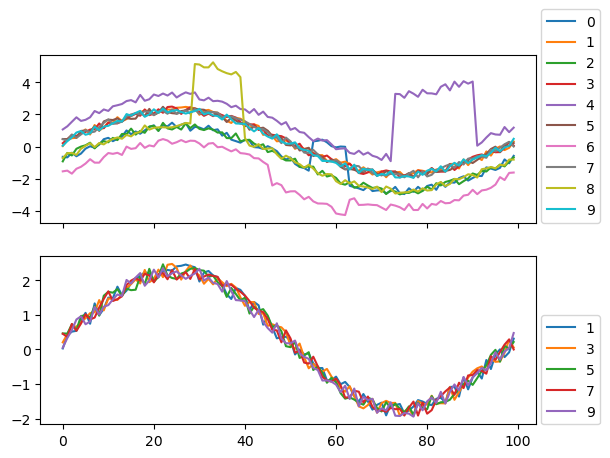

In [4]:
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> rng = np.random.default_rng()
>>> t, n = 100, 10
>>> y = rng.random((t, n)) / 2
>>> y +=  np.atleast_2d(2*np.sin(2*np.pi*np.linspace(0, 1, t))).T
>>> for i in range(0, n, 2):
>>>    j = rng.integers(t-20)
>>>    p = rng.integers(20)
>>>    y[j:j+p, i] = y[j:j+p, i] + rng.integers(10) - 5
>>>    y[:, i] += rng.integers(4) - 2
>>> ys, ikept, inotkept, scores = similarity(y)
>>> fig, axs = plt.subplots(2, 1, sharex=True)
>>> axs[0].plot(y, label=list(range(n)))
>>> axs[0].legend(loc=(1.01, 0))
>>> axs[1].plot(ys, label= ikept.tolist())
>>> axs[1].legend(loc=(1.01, 0))
>>> plt.show()

In [5]:
ys, ikept, inotkept, scores = similarity(y, threshold=0, nmin=3, repeat=True, metric=mse,
                                         msg=1, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=5): [4 6 8 0 2]


In [6]:
ys.shape

(100, 5)

In [7]:
ikept

array([1, 3, 5, 7, 9])

In [8]:
inotkept

array([4, 6, 8, 0, 2])

In [9]:
scores

array([[2.015e+00, 8.405e-02, 1.916e+00, 7.734e-02, 1.259e+01, 7.096e-02,
        9.854e+00, 7.019e-02, 3.655e+00, 5.838e-02],
       [1.533e+01, 1.000e+00, 1.425e+01, 9.495e-01,       nan, 8.342e-01,
        7.783e+01, 8.430e-01, 2.954e+01, 7.028e-01],
       [2.497e+01, 1.042e+00, 2.374e+01, 9.585e-01,       nan, 8.793e-01,
              nan, 8.698e-01, 4.530e+01, 7.235e-01],
       [3.575e+01, 1.086e+00, 3.460e+01, 9.549e-01,       nan, 9.667e-01,
              nan, 1.000e+00,       nan, 7.972e-01],
       [      nan, 1.142e+00, 4.867e+01, 9.650e-01,       nan, 9.006e-01,
              nan, 1.035e+00,       nan, 8.827e-01],
       [      nan, 1.030e+00,       nan, 9.187e-01,       nan, 8.542e-01,
              nan, 1.018e+00,       nan, 1.000e+00]])

In [10]:
ys, ikept, inotkept, scores = similarity(y, threshold=0, nmin=3, repeat=True, metric=mse,
                                         drop=False, msg=True, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=5): [4 6 8 0 2]


In [11]:
ys.shape

(100, 10)

In [12]:
ys, ikept, inotkept, scores = similarity(y, threshold=0, nmin=3, repeat=False, metric=mse,
                                         msg=True, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=3): [4 6 8]


## Function profiling

In [13]:
%%timeit
ys, ikept, inotkept, score_all = similarity(y, repeat=True, msg=False)

3.73 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
ys, ikept, inotkept, score_all = similarity(y, repeat=False, msg=False)

1.25 ms ± 4.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
%lprun -f similarity similarity(y, msg=False)

Timer unit: 1e-09 s

Total time: 0.00771548 s
File: /home/marcos/adrive/Python/BMC/notebooks/./../functions/simila.py
Function: similarity at line 77

Line #      Hits         Time  Per Hit   % Time  Line Contents
    77                                           def similarity(y: np.ndarray, axis1: int = 0, axis2: int = 1, threshold: float = 0,
    78                                                          nmin: int = 3, repeat: bool = True, metric: Callable = mse,
    79                                                          drop=True, msg: bool = True, **kwargs: Callable
    80                                                          ) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    81                                           
    82                                               """Select data vectors by similarity using a metric score.
    83                                           
    84                                               Parameters
    85           

## Function `similarity`

In [16]:
# %load ./../functions/simila.py
"""Select data vectors by similarity using a metric score.
"""

from typing import Callable
import numpy as np
import logging

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'simila.py v.1.0.0 20123/07/31'
__license__ = "MIT"

# set logger and configure it not to confuse with matplotlib debug messages
logger = logging.getLogger(__name__)
logger.setLevel(20)  # 0: NOTSET, 10: DEBUG, 20: INFO, 30: WARNING, 40: ERROR, 50: CRITICAL
ch = logging.StreamHandler()
formatter = logging.Formatter('{name}: {levelname}: {message}', style='{')
ch.setFormatter(formatter)
logger.addHandler(ch)


def mse(y: np.ndarray, axis1: int = 0, axis2: int = 1, central: Callable = np.nanmedian,
        normalization: Callable = np.nanmedian
        ) -> np.ndarray:
    """Mean Squared Error of `y` w.r.t. `central` across axis2 over axis1.

    Parameters
    ----------
    y : numpy array
        an at least 2D array of data for the calculation of mean squared error
        w.r.t. to a `central` statistics.
    axis1 : integer, optional (default = 0)
        axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        axis to slice `y` ndarray in the calculation of the `central`.
    central : Python function, optional (default = np.nanmedian)
        function to calculate statistics on `y` w.r.t. mse is computed.
    normalization : Python function, optional (default = np.nanmedian)
        function to normalize the calculated mse values

    Returns
    -------
    score : numpy array
        Mean Squared Error values

    References
    ----------
    .. [1] https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/Similarity.ipynb

    Examples
    --------
    >>> import numpy as np
    >>> rng = np.random.default_rng()
    >>> y = rng.random((100, 10))
    >>> y +=  np.atleast_2d(np.sin(2*np.pi*np.linspace(0, 1, 100))).T
    >>> mse(y, axis1=0, axis2=1, central=np.nanmedian, normalization=np.nanmedian)

    Version history
    ---------------
    '1.0.0':
        First release version
    """

    logger.debug('mse...')

    score = np.empty((y.shape[axis2]))
    score.fill(np.nan)
    idx = np.where(~np.all(np.isnan(y), axis=axis1))[0]  # masked array is slow
    y = y.swapaxes(0, axis2)[idx, ...].swapaxes(0, axis2)  # faster than .take
    score[idx] = np.nanmean((y - central(y, axis=axis2, keepdims=True))**2, axis=axis1)
    if normalization is not None:
        score = score/normalization(score)
    logger.debug(f'idx: {idx}, score: {score}')

    return score


def similarity(y: np.ndarray, axis1: int = 0, axis2: int = 1, threshold: float = 0,
               nmin: int = 3, repeat: bool = True, metric: Callable = mse,
               drop=True, msg: bool = True, **kwargs: Callable
               ) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    """Select data vectors by similarity using a metric score.

    Parameters
    ----------
    y : numpy array
        Array for the calculation of mse w.r.t. to a central statistics.
    axis1 : integer, optional (default = 0)
        Axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        Axis to slice `y` ndarray in the calculation of the `central`.
    threshold : float, optional (default = 0)
        If greater than 0, vector with mse above it will be discarded.
        If 0, threshold will be automatically calculated as the
        minimum of [q[1] + 1.5*(q[2]-q[0]), score[-2], 3], where q's are the
        quantiles and score[-2] is the before-last largest score of `metric`
        among vectors calculated at the first time, not updated by `repeat`
        option.
    nmin : integer, optional (default = 3)
        If greater than 0, minumum number of vectors to keep.
        If lower than 0, maximum number of vectors to discard.
    repeat :bool, optional (default = True)
        Whether to calculate similarity `metric` repeatedly, updating the
        score calculation each time a vector is discarded.
        With `repeat` True, the output `scores` will contain at each row
        the updated score values for the used `metric` for each data vector.
        The first row will contain the calculated original scores before any
        vector was discarded. On the next equent rows, the vectors discarded
        are represented by NaN values and the kept vectors by their updated
        scores.
        The last row will contain the updated scores of the final vectors kept.
        With the `repeat` False, the comparison of score values with
        `threshold` are made only once and vectors are discarded accordingly at
        once. In this case, the output `scores` will contain only two rows, the
        first row will contain the calculated original scores before any
        vectors were discarded. At the second row, the vectors discarded are
        represented with NaN values and the kept vectors by their updated
        scores.
    metric : optional (default=mse)
        Function to use as metric to compute similarity.
    drop : bool, optional (default = True)
        Whether to drop (delete) the discarded vectors from `y` in the output.
        If False, the values of the vectors discarded will be replaced by nans
        and the returned array will have the same dimensions as the original
        array.
    msg : bool, optional (default = True)
        Whether to print some messages.
    kwargs : optional
        Options for the metric function (e.g., see `mse` function).

    Returns
    -------
    y : numpy array
        Array similar to input `y` but with vectors discarded (deleted) if
        option `drop` is True or with all values of vectors discarded replaced
        by nans if option `drop` is False.
    ikept : numpy array
        Indexes of kept vectors.
    inotkept : numpy array
        Indexes of not kept (discarded or replaced by nan) vectors.
    scores : 2-D numpy array
        Metric score values of each vector (as columns) for each round of
        vector selection (one row per round plus the final values).

    References
    ----------
    .. [1] https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/Similarity.ipynb

    Examples
    --------
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> rng = np.random.default_rng()
    >>> t, n = 100, 10
    >>> y = rng.random((t, n)) / 2
    >>> y +=  np.atleast_2d(2*np.sin(2*np.pi*np.linspace(0, 1, t))).T
    >>> for i in range(0, n, 2):
    >>>    j = rng.integers(t-20)
    >>>    p = rng.integers(20)
    >>>    y[j:j+p, i] = y[j:j+p, i] + rng.integers(10) - 5
    >>>    y[:, i] += rng.integers(4) - 2
    >>> ys, ikept, inotkept, scores = similarity(y)
    >>> fig, axs = plt.subplots(2, 1, sharex=True)
    >>> axs[0].plot(y, label=list(range(n)))
    >>> axs[0].legend(loc=(1.01, 0))
    >>> axs[1].plot(ys, label= ikept.tolist())
    >>> axs[1].legend(loc=(1.01, 0))
    >>> plt.show()

    Version history
    ---------------
    '1.0.0':
        First release version
    """

    logger.debug('Similarity...')

    if y.ndim < 2:
        raise ValueError('The input array must be at least a 2-D array.')
    y = y.copy()
    score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
    scores = np.atleast_2d(score)
    ikept = np.where(~np.isnan(score))[0]  # indexes of kept vectors
    inotkept = np.where(np.isnan(score))[0]  # indexes of discarded vectors
    idx = np.argsort(score)
    score = score[idx]
    nkept = np.count_nonzero(~np.isnan(score))  # number of kept vectors
    if nkept < 3:
        logger.debug(f'nkept: {nkept}')
        raise ValueError('The input array must have at least 3 valid vectors.')
    if nmin < 0:
        nmin = np.max([3, nkept + nmin])
    if threshold == 0:
        q = np.nanquantile(a=score, q=[.25, .50, .75])
        threshold = np.min([q[1] + 1.5*(q[2]-q[0]), score[-2], 3.])
        if msg:
            print(f'Calculated threshold: {threshold}')
    if not repeat:  # discard all vectors at once
        idx2 = np.nonzero(score > threshold)[0]  # vectors to discard
        if len(idx2) > 0:
            if nkept > nmin:  # keep at least nmin vectors
                inotkept = np.r_[inotkept, idx[idx2[-(y.shape[axis2] - nmin):]][::-1]]
                y.swapaxes(0, axis2)[inotkept, ...] = np.nan
                score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
                logger.debug(f'not repeat - score: {score}')
                scores = np.vstack((scores, score))
    else:  # discard vector with largest updated score one by one
        while nkept > nmin and score[nkept-1] > threshold:
            inotkept = np.r_[inotkept, idx[nkept-1]]
            y.swapaxes(0, axis2)[inotkept[-1], ...] = np.nan
            score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
            scores = np.vstack((scores, score))
            idx = np.argsort(score)
            score = score[idx]
            nkept = nkept - 1
            logger.debug(f'repeat - nkept: {nkept}, score: {score}')

    if len(inotkept):
        ikept = np.setdiff1d(ikept, inotkept)
        if drop:
            y = y.swapaxes(0, axis2)[ikept, ...].swapaxes(0, axis2)
        if msg:
            print(
                  f'Vectors discarded (dimension {axis2}, n={len(inotkept)}): {inotkept}')

    return y, ikept, inotkept, scores
